In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data-set for decision tree.csv')

In [3]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [4]:
df.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [5]:
print("Work Class\n",df['workclass'].unique())
print("\nEducation\n",df['education'].unique())
print("\nMarital Status\n",df['marital.status'].unique())
print("\nOccupation\n",df['occupation'].unique())
print("\nRelationship\n",df['relationship'].unique())
print("\nRace\n",df['race'].unique())
print("\nSex\n",df['sex'].unique())
print("\nNative Country\n",df['native.country'].unique())
print("\nIncome\n",df['income'].unique())

Work Class
 ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Education
 ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Marital Status
 ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Occupation
 ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Relationship
 ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Race
 ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Sex
 ['Female' 'Male']

Native Country
 ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Tr

In [6]:
df[df['workclass']=="?"]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
14,?,Doctorate,Never-married,?,Not-in-family,White,Male,United-States,>50K
24,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States,<=50K
44,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32533,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,United-States,>50K
32534,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,United-States,<=50K
32541,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,United-States,>50K
32543,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States,<=50K


In [7]:
df[df['occupation']=="?"]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
14,?,Doctorate,Never-married,?,Not-in-family,White,Male,United-States,>50K
24,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States,<=50K
44,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32533,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,United-States,>50K
32534,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,United-States,<=50K
32541,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,United-States,>50K
32543,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States,<=50K


In [8]:
df[df['native.country']=="?"]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
9,Private,Some-college,Never-married,Craft-repair,Unmarried,White,Male,?,>50K
18,Private,Assoc-acdm,Never-married,Handlers-cleaners,Not-in-family,Black,Male,?,>50K
65,Self-emp-inc,Assoc-voc,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,?,>50K
86,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,?,>50K
87,Federal-gov,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,?,>50K
...,...,...,...,...,...,...,...,...,...
32459,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,?,>50K
32476,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,?,<=50K
32498,Self-emp-not-inc,HS-grad,Divorced,Sales,Own-child,White,Male,?,<=50K
32515,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,?,>50K


In [9]:
df = df[(df['workclass']!='?')&(df['occupation']!='?')&(df['native.country']!='?')]
print("Total Rows After Cleaning",len(df))

Total Rows After Cleaning 30162


There is only 7.4% of data containing "?", so I prefer removing it instead of replacing it. Replacing may introduce incorrect values, while removing ensures cleaner and more reliable data.

In [10]:
#Encoding categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

I am using label encoding because my categorical features have ordinal relationships, and label encoding keeps the order while avoiding the increased dimensionality of one-hot encoding.

In [11]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0
...,...,...,...,...,...,...,...,...,...
32556,2,15,4,10,1,4,1,38,0
32557,2,7,2,12,5,4,0,38,0
32558,2,11,2,6,0,4,1,38,1
32559,2,11,6,0,4,4,0,38,0


In [12]:
df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']].corr()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
workclass,1.000000,0.017855,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.007668,0.018044
education,0.017855,1.000000,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.078790,0.078987
marital.status,-0.034241,-0.040664,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.025902,-0.193518
occupation,0.015572,-0.038212,0.022655,1.000000,-0.053727,0.000717,0.062313,-0.003483,0.051577
relationship,-0.067417,-0.012717,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.010809,-0.251003
race,0.044731,0.011154,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.124514,0.071658
sex,0.074973,-0.027888,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.000618,0.216699
native.country,0.007668,0.078790,-0.025902,-0.003483,-0.010809,0.124514,0.000618,1.000000,0.023268
income,0.018044,0.078987,-0.193518,0.051577,-0.251003,0.071658,0.216699,0.023268,1.000000


In [13]:
X =df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']]
y =df['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

I am using random_state=42 to ensure consistent results every time I run the model. This makes my train-test split reproducible, preventing variations in accuracy across different runs.

In [45]:
DT = DecisionTreeClassifier(criterion="entropy",max_depth=10, min_samples_split=10, random_state=42)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)

I set max_depth=10 and min_samples_split=10 to control overfitting by limiting the depth of the tree and ensuring splits occur only when there are enough samples, making the model more generalizable.

In [47]:
y_pred=DT.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
accuracy_score(y_test,y_pred)

0.8140228741919443

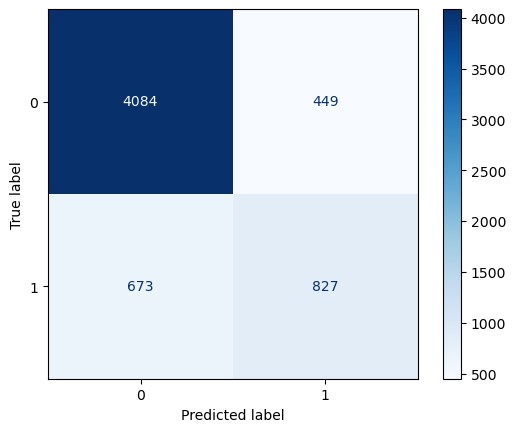

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [53]:
report  = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4533
           1       0.65      0.55      0.60      1500

    accuracy                           0.81      6033
   macro avg       0.75      0.73      0.74      6033
weighted avg       0.81      0.81      0.81      6033



Dataset has 24,720 rows for low income and only 7,841 for high income. This imbalance causes the model to favor the majority class, leading to poor performance in predicting the minority class.

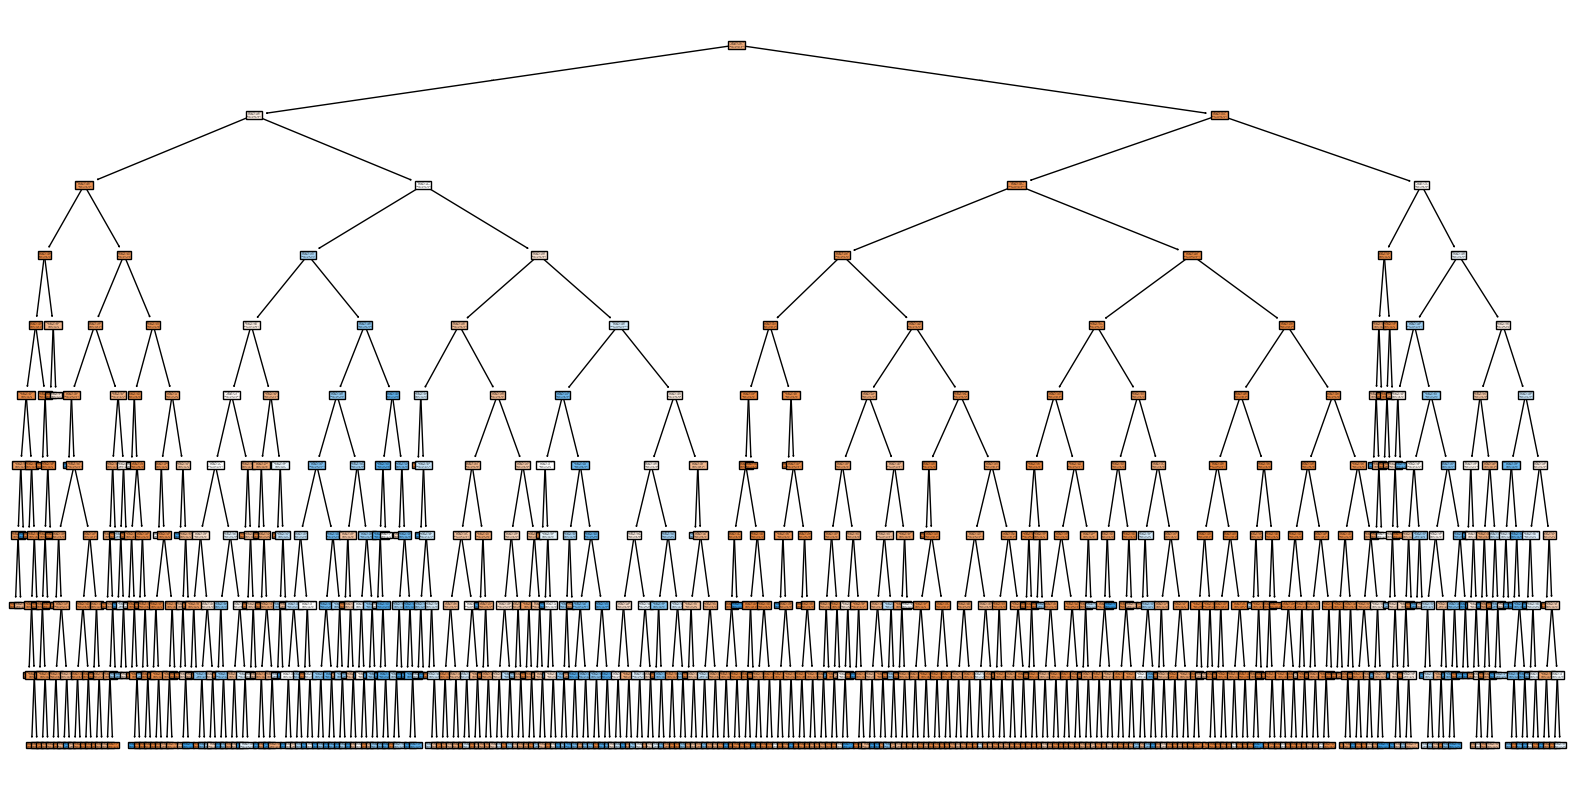

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(DT, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()